# Import Library

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost skrebate

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


In [2]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.feature_selection import chi2, RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from skrebate import ReliefF

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

# Load the Data

In [4]:
colorectal_df = pd.read_csv('../../../DEG/New/colorectal_ml_data_lfc.csv')

# Separate the Data into Target and Feature Variable

In [5]:
X = colorectal_df.drop('sample_type', axis=1)
y = colorectal_df['sample_type']

In [6]:
X

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11746954_s_at,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at
0,3.961224,3.525653,4.091227,3.811626,3.549324,11.535893,12.238765,4.841666,7.829440,4.656073,...,4.406110,6.741569,5.068841,5.715088,9.303970,6.956112,3.057794,2.083697,8.287012,2.536826
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,3.625949,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182
2,2.915041,3.344269,4.736746,2.556401,5.618344,11.352166,12.378740,5.376771,6.990490,5.228995,...,3.082158,7.939907,8.502685,6.735144,8.697731,10.182467,10.466810,9.071230,2.764370,2.954533
3,4.619689,3.758475,3.861172,3.595169,3.974721,10.968717,12.480088,4.561874,6.908015,4.668323,...,5.035919,7.004064,4.596727,5.208766,4.885240,7.476517,3.048054,2.269150,7.833188,9.360527
4,4.173030,3.124475,4.084866,2.952316,4.199110,10.728334,12.545863,4.664203,7.205106,4.689223,...,6.359717,6.957954,5.230019,3.299203,8.718398,9.411712,9.604081,7.674544,7.982482,3.562634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,5.847487,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183
242,9.072294,8.660195,7.103051,7.318572,7.238546,3.182021,10.253128,9.827421,2.881668,7.167934,...,4.906681,8.174446,5.976072,7.827573,9.847743,10.736953,2.480961,1.999230,1.970573,2.255261
243,9.086258,7.229068,5.881465,7.999610,7.137488,2.663260,10.493696,8.703273,2.174059,6.562482,...,7.744336,3.690160,7.014529,8.492737,6.280359,2.605201,9.853237,8.138803,9.500060,3.098058
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,7.120815,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845


In [7]:
y

0      Mucosa
1      Mucosa
2      Mucosa
3      Mucosa
4      Mucosa
        ...  
241     Tumor
242     Tumor
243     Tumor
244     Tumor
245     Tumor
Name: sample_type, Length: 246, dtype: object

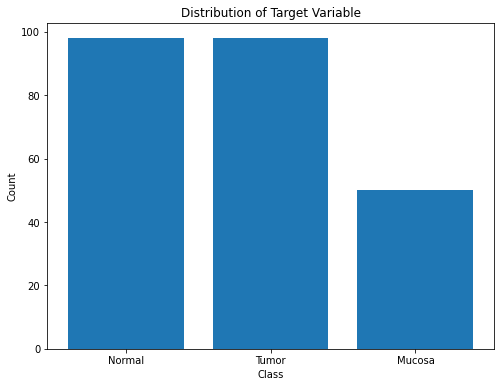

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y)

# Count class frequencies
class_counts = y_train_series.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Encode Lables

In [9]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [10]:
classes

array([0, 1, 2])

In [11]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

In [12]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

# Data splilting into traning testing and validation sets

In [13]:
# Split data into train, validation, and test sets using stratified sampling
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=random_state)

In [14]:
X_train

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11746954_s_at,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at
197,7.797289,8.657750,5.529000,6.334844,8.753693,3.305205,10.311467,8.284614,2.866454,6.700208,...,6.080695,5.045083,4.921582,8.888502,5.022032,9.310744,2.894074,2.168256,9.075279,9.818484
201,9.084894,7.850031,7.010344,6.790167,8.273837,3.655921,10.307853,8.223095,2.822097,7.892033,...,5.443581,7.630364,4.801176,8.119707,5.275026,4.358920,2.665073,2.497180,4.882671,3.005642
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,7.120815,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,3.625949,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182
193,7.972969,9.186005,8.505547,6.659749,7.839987,3.013364,10.467159,8.180332,3.085692,8.251122,...,2.911480,2.879531,2.988148,9.880858,7.033530,2.381567,3.177422,2.920934,2.153887,2.650424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,8.723016,7.354809,7.717315,7.329348,7.524983,3.261232,10.609555,7.419988,2.618752,6.394095,...,5.260981,9.090034,4.967147,7.106459,4.587652,12.458564,2.597004,2.100963,8.062830,3.083489
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,5.847487,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183
159,8.159823,9.739355,7.506296,6.282101,8.678580,2.781816,10.446509,8.524104,2.970882,7.078129,...,4.015561,5.043604,4.805392,3.198002,5.340898,6.685070,2.329299,2.599321,4.870298,3.641333
166,8.722603,5.988202,6.014926,6.494509,6.334723,6.951741,11.907275,6.745460,3.759767,5.977971,...,3.826198,7.130622,5.464048,5.335154,9.583354,10.431166,2.988668,2.297318,2.218094,10.528625


In [15]:
y_train

array([2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2])

In [16]:
# Perform oversampling on the training data
smote = SMOTE(random_state = random_state)
X_train, y_train = smote.fit_resample(X_train, y_train)

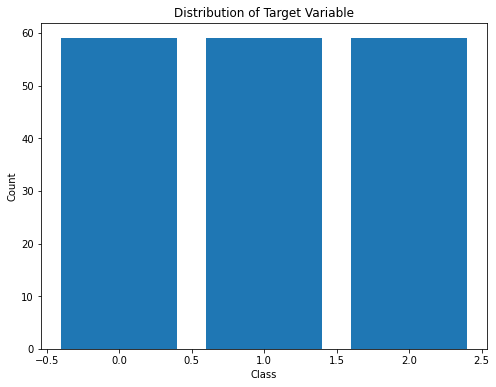

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Count class frequencies
class_counts = y_train_series.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [18]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

# Feature Selection Methods

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from joblib import Parallel, delayed
from skrebate import ReliefF  # Assuming ReliefF is imported from skrebate

# Assuming X_train_norm, y_train, X_train, X_test_norm, X_val_norm are already defined

n_features_to_select = 50
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
feature_importances = np.zeros(X_train_norm.shape[1])

# Function to process each fold
def process_fold(train_idx, test_idx):
    X_train_cv, X_test_cv = X_train_norm[train_idx], X_train_norm[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]

    feature_selector = ReliefF()
    feature_selector.fit(X_train_cv, y_train_cv)
    selected_features = np.argsort(feature_selector.feature_importances_)[-n_features_to_select:]
    
    return selected_features

# Run the cross-validation loop in parallel
selected_features_list = Parallel(n_jobs=-1)(delayed(process_fold)(train_idx, test_idx) for train_idx, test_idx in cv.split(X_train_norm, y_train))

# Aggregate feature importances
for selected_features in selected_features_list:
    feature_importances[selected_features] += 1

# Normalize feature importance scores
feature_importances /= cv.n_splits

# Select top k features
top_features_to_select = 50
top_k_features = np.argsort(feature_importances)[-top_features_to_select:]
selected_features_names = X_train.columns[top_k_features]
print("Selected Features:", selected_features_names)

# Use selected features for model training/testing
X_train_selected = X_train_norm[:, top_k_features]
X_test_selected = X_test_norm[:, top_k_features]
X_val_selected = X_val_norm[:, top_k_features]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

Selected Features: Index(['11759415_at', '11731957_at', '11758861_at', '11734319_a_at',
       '11719434_a_at', '11725226_at', '11736852_at', '11727554_s_at',
       '11722059_at', '11724965_at', '11731120_at', '11715228_s_at',
       '11746142_a_at', '11758028_s_at', '11728232_a_at', '11736163_a_at',
       '11734459_x_at', '11734322_at', '11721557_a_at', '11724538_a_at',
       '11722783_at', '11737294_a_at', '11759464_at', '11733581_a_at',
       '11721993_at', '11754709_x_at', '11732838_at', '11728771_a_at',
       '11728575_a_at', '11735833_a_at', '11726764_at', '11723826_a_at',
       '11754909_a_at', '11742188_a_at', '11717820_a_at', '11732699_a_at',
       '11732700_x_at', '11715104_s_at', '11730091_at', '11730973_a_at',
       '11756338_x_at', '11729583_x_at', '11729582_s_at', '11727553_a_at',
       '11755975_x_at', '11717822_a_at', '11740060_at', '11733744_at',
       '11730765_at', '11734320_a_at'],
      dtype='object')


In [20]:
df = pd.read_csv('../../../colorectal_annot.csv')

In [21]:
# Read the file into a DataFrame
df = pd.read_csv('../../../colorectal_annot.csv')

# Create a list of selected features
selected_features = selected_features_names

# Filter the DataFrame to include only the selected features
selected_features_df = df[df['ID'].isin(selected_features)]

# Print the selected features and their gene symbols
print(selected_features_df)

                ID Gene.Symbol
0    11735833_a_at    KIAA1199
1    11728232_a_at       CLDN1
3    11719434_a_at        ETV4
4      11732838_at      GUCA2B
6      11721993_at      SLC6A6
8    11724538_a_at       ABCG2
9      11726764_at        AQP8
10   11737294_a_at      TMIGD1
11   11733581_a_at         CA7
13     11722783_at       FOXQ1
14     11759464_at       OTOP2
15   11721557_a_at       ABCA8
16   11742188_a_at      SLC4A4
19   11746142_a_at      ZNF611
20   11758028_s_at       FOXQ1
22   11717822_a_at      SLC4A4
24   11729582_s_at         CA1
26   11729583_x_at         CA1
28     11734322_at        BMP3
29   11723826_a_at     C2orf88
33   11734320_a_at     SLC17A4
35     11724965_at        RDH5
39     11736852_at      LRRC19
44     11730091_at       BEST4
45   11715104_s_at       OTOP2
49     11731957_at      GUCA2A
58   11754909_a_at     C2orf88
62   11715228_s_at     OSTBETA
64   11732699_a_at        PKIB
80   11732700_x_at        PKIB
84     11759415_at     OSTBETA
86   117

In [22]:
# Gene.Symbol is the column containing gene symbols
gene_symbols = selected_features_df['Gene.Symbol'].tolist()

# Print the gene symbols
print(gene_symbols)


['KIAA1199', 'CLDN1', 'ETV4', 'GUCA2B', 'SLC6A6', 'ABCG2', 'AQP8', 'TMIGD1', 'CA7', 'FOXQ1', 'OTOP2', 'ABCA8', 'SLC4A4', 'ZNF611', 'FOXQ1', 'SLC4A4', 'CA1', 'CA1', 'BMP3', 'C2orf88', 'SLC17A4', 'RDH5', 'LRRC19', 'BEST4', 'OTOP2', 'GUCA2A', 'C2orf88', 'OSTBETA', 'PKIB', 'PKIB', 'OSTBETA', 'CDKN2B', 'PKIB', 'CWH43', 'SLC25A34', 'DHRS11', 'PDE6A', 'PKIB', 'SLC4A4', 'SLC17A4', 'CA4', 'PKIB', 'EDN3', 'ZG16', 'CHP2', 'MS4A12', 'FABP2', 'CLCA4', 'CD177', 'ZG16']


# Model Traning

# Random Forest

In [23]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=random_state)
cv_scores_rf = cross_val_score(rf_clf,X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Random Forest Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_rf)))
rf_clf.fit(X_train_selected, y_train)

Random Forest Mean cross-validation accuracy: 0.93


RandomForestClassifier(random_state=42)

Accuracy: 0.9400
Balanced Accuracy: 0.9333
F1-score: 0.9337
Precision: 0.9349
Recall: 0.9333

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.90      0.90      0.90        10
      Normal       0.90      0.95      0.93        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.94        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.94      0.94      0.94        50



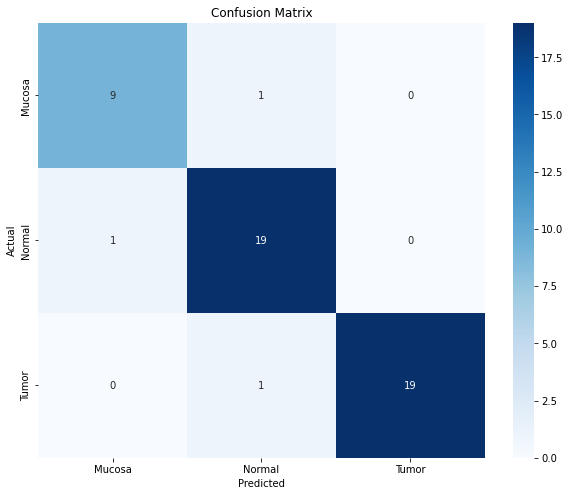

In [24]:
# Evaluate the model performance on the test set
y_pred = rf_clf.predict(X_test_selected)

accuracy_rf = accuracy_score(y_test, y_pred)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='macro')
precision_rf = precision_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Balanced Accuracy: {balanced_accuracy_rf:.4f}')
print(f'F1-score: {f1_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Evaluate the model performance on the validation set
y_pred_val_rf = rf_clf.predict(X_val_selected)

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
balanced_accuracy_val_rf = balanced_accuracy_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf, average='macro')
precision_val_rf = precision_score(y_val, y_pred_val_rf, average='macro')
recall_val_rf = recall_score(y_val, y_pred_val_rf, average='macro')

print("\nRandom Forest Validation Metrics:")
print(f'Accuracy: {accuracy_val_rf:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_rf:.2f}')
print(f'F1-score: {f1_val_rf:.2f}')
print(f'Precision: {precision_val_rf:.2f}')
print(f'Recall: {recall_val_rf:.2f}')


Random Forest Validation Metrics:
Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.96
Precision: 0.97
Recall: 0.95


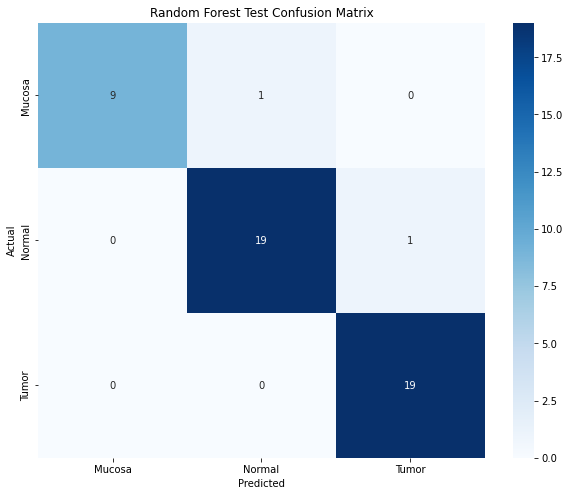

In [26]:
# Plot the confusion matrix
cm_test_rf = confusion_matrix(y_val, y_pred_val_rf)
cm_df_test_rf = pd.DataFrame(cm_test_rf, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_test_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine

In [27]:
# Train the SVM classifier with the selected features
svm_clf = SVC(random_state=random_state)
cv_scores_svm = cross_val_score(svm_clf,X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("SVM Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_svm)))
svm_clf.fit(X_train_selected,y_train)


SVM Mean cross-validation accuracy: 0.93


SVC(random_state=42)

Accuracy: 0.94
Balanced Accuracy: 0.95
F1-score: 0.94
Precision: 0.93
Recall: 0.95

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.83      1.00      0.91        10
      Normal       0.95      0.90      0.92        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.94        50
   macro avg       0.93      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



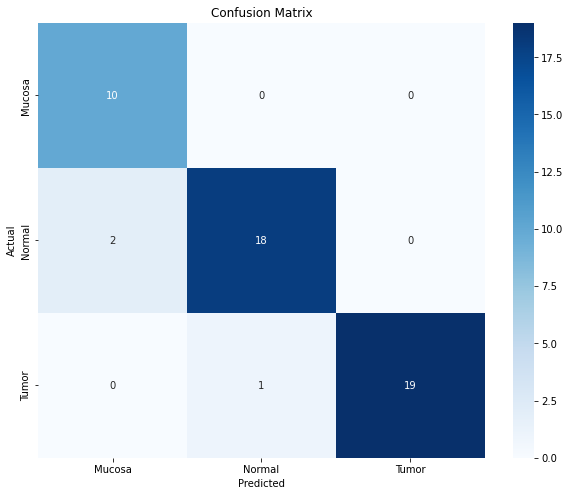

In [28]:
# Evaluate the model performance on the test set
y_pred = svm_clf.predict(X_test_selected)

accuracy_svm = accuracy_score(y_test, y_pred)
balanced_accuracy_svm = balanced_accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average='macro')
precision_svm = precision_score(y_test, y_pred, average='macro')
recall_svm = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy_svm:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_svm:.2f}')
print(f'F1-score: {f1_svm:.2f}')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
y_pred_val_svm = svm_clf.predict(X_val_selected)
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
balanced_accuracy_val_svm = balanced_accuracy_score(y_val, y_pred_val_svm)
f1_val_svm = f1_score(y_val, y_pred_val_svm, average='macro')
precision_val_svm = precision_score(y_val, y_pred_val_svm, average='macro')
recall_val_svm = recall_score(y_val, y_pred_val_svm, average='macro')
print("\nSVM Validation Metrics:")
print(f'Accuracy: {accuracy_val_svm:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_svm:.2f}')
print(f'F1-score: {f1_val_svm:.2f}')
print(f'Precision: {precision_val_svm:.2f}')
print(f'Recall: {recall_val_svm:.2f}')


SVM Validation Metrics:
Accuracy: 0.94
Balanced Accuracy: 0.93
F1-score: 0.93
Precision: 0.93
Recall: 0.93


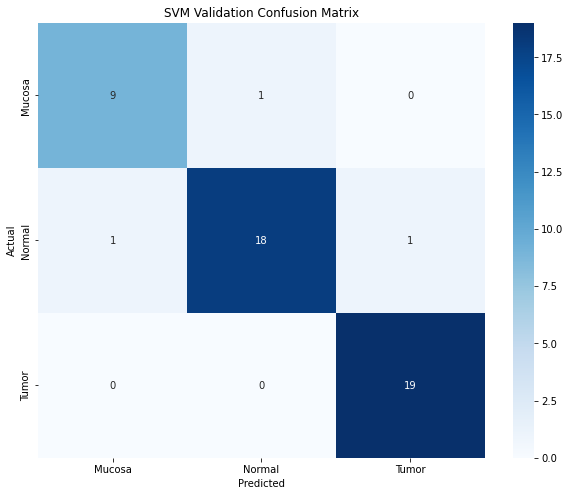

In [30]:
# Plot the confusion matrix for validation set
cm_val_svm = confusion_matrix(y_val, y_pred_val_svm)
cm_df_val_svm = pd.DataFrame(cm_val_svm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_svm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_clf = LogisticRegression(random_state=random_state)
cv_scores_lr = cross_val_score(lr_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_lr)))
lr_clf.fit(X_train_selected, y_train)

Logistic Regression Mean cross-validation accuracy: 0.97


LogisticRegression(random_state=42)

Accuracy: 0.92
Balanced Accuracy: 0.92
F1-score: 0.91
Precision: 0.91
Recall: 0.92

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.82      0.90      0.86        10
      Normal       0.90      0.90      0.90        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.92        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.92      0.92      0.92        50



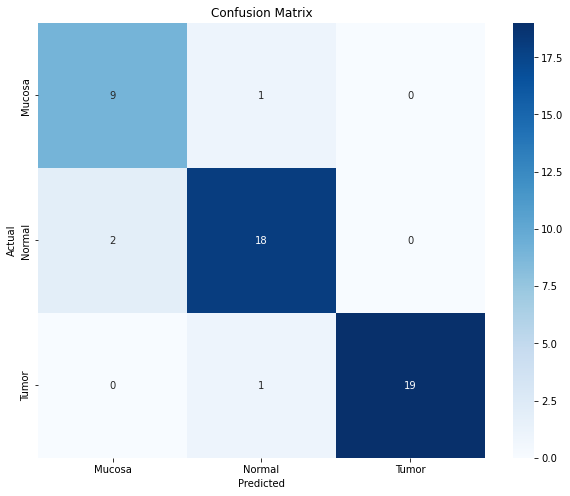

In [32]:
# Evaluate the model performance on the test set
y_pred_lr = lr_clf.predict(X_test_selected)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
balanced_accuracy_lr = balanced_accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')

print(f'Accuracy: {accuracy_lr:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_lr:.2f}')
print(f'F1-score: {f1_lr:.2f}')
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_lr, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

\LR Validation Metrics:
Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.96
Precision: 0.97
Recall: 0.95


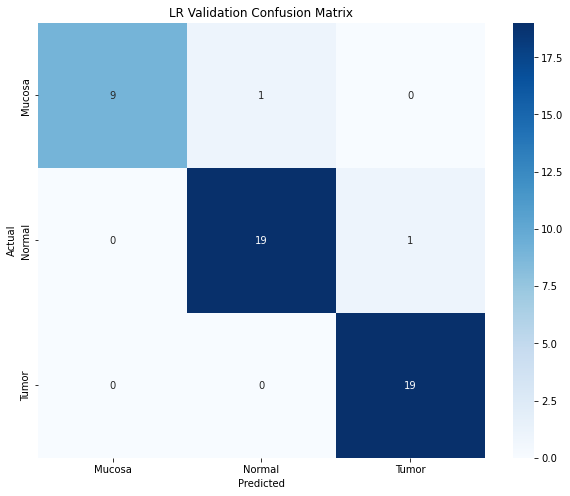

In [33]:
y_pred_val_lr = lr_clf.predict(X_val_selected)
accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)
balanced_accuracy_val_lr = balanced_accuracy_score(y_val, y_pred_val_lr)
f1_val_lr = f1_score(y_val, y_pred_val_lr, average='macro')
precision_val_lr = precision_score(y_val, y_pred_val_lr, average='macro')
recall_val_lr = recall_score(y_val, y_pred_val_lr, average='macro')
print("\LR Validation Metrics:")
print(f'Accuracy: {accuracy_val_lr:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_lr:.2f}')
print(f'F1-score: {f1_val_lr:.2f}')
print(f'Precision: {precision_val_lr:.2f}')
print(f'Recall: {recall_val_lr:.2f}')
# Plot the confusion matrix for validation set
cm_val_lr = confusion_matrix(y_val, y_pred_val_lr)
cm_df_val_lr = pd.DataFrame(cm_val_lr, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_lr, annot=True, cmap='Blues', fmt='g')
plt.title('LR Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_clf = KNeighborsClassifier()
cv_scores_knn = cross_val_score(knn_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("KNN Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_knn)))
knn_clf.fit(X_train_selected, y_train)

KNN Mean cross-validation accuracy: 0.92


KNeighborsClassifier()

Accuracy: 0.96
Balanced Accuracy: 0.97
F1-score: 0.96
Precision: 0.95
Recall: 0.97

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.91      1.00      0.95        10
      Normal       0.95      0.95      0.95        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



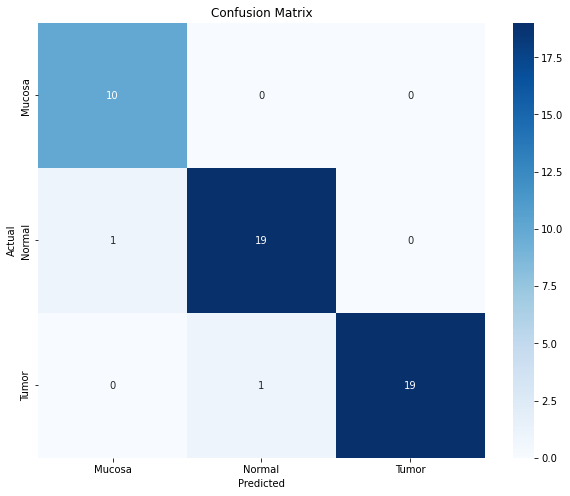

In [35]:
# Evaluate the model performance on the test set
y_pred_knn = knn_clf.predict(X_test_selected)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
balanced_accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')

print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_knn:.2f}')
print(f'F1-score: {f1_knn:.2f}')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_knn, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Validation Metrics:
Accuracy: 0.92
Balanced Accuracy: 0.90
F1-score: 0.91
Precision: 0.91
Recall: 0.90


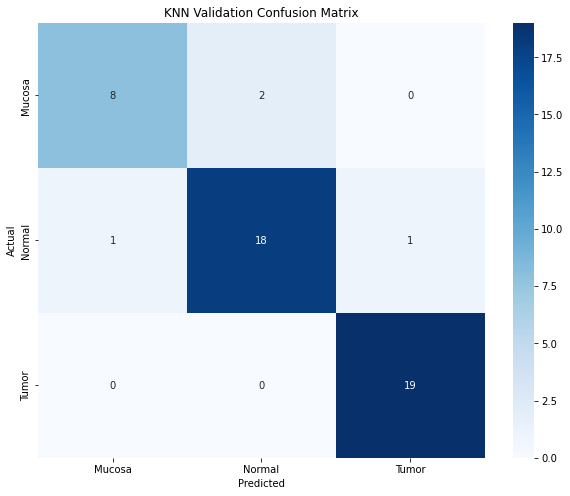

In [36]:
y_pred_val_knn = knn_clf.predict(X_val_selected)
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
balanced_accuracy_val_knn = balanced_accuracy_score(y_val, y_pred_val_knn)
f1_val_knn = f1_score(y_val, y_pred_val_knn, average='macro')
precision_val_knn = precision_score(y_val, y_pred_val_knn, average='macro')
recall_val_knn = recall_score(y_val, y_pred_val_knn, average='macro')
print("\nKNN Validation Metrics:")
print(f'Accuracy: {accuracy_val_knn:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_knn:.2f}')
print(f'F1-score: {f1_val_knn:.2f}')
print(f'Precision: {precision_val_knn:.2f}')
print(f'Recall: {recall_val_knn:.2f}')
# Plot the confusion matrix for validation set
cm_val_knn = confusion_matrix(y_val, y_pred_val_knn)
cm_df_val_knn = pd.DataFrame(cm_val_knn, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_knn, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost

In [37]:
# Train XGBoost
xgb_clf = XGBClassifier(random_state=random_state)
cv_scores_xgb = cross_val_score(xgb_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("XGBoost Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_xgb)))
xgb_clf.fit(X_train_selected, y_train)

XGBoost Mean cross-validation accuracy: 0.91


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.96
Balanced Accuracy: 0.93
F1-score: 0.95
Precision: 0.97
Recall: 0.93

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      0.80      0.89        10
      Normal       0.91      1.00      0.95        20
       Tumor       1.00      1.00      1.00        20

    accuracy                           0.96        50
   macro avg       0.97      0.93      0.95        50
weighted avg       0.96      0.96      0.96        50



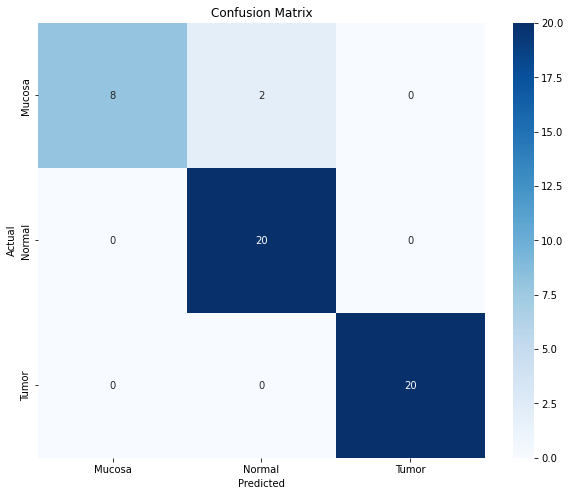

In [38]:
# Evaluate the model performance on the test set
y_pred_xgb = xgb_clf.predict(X_test_selected)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')

print(f'Accuracy: {accuracy_xgb:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_xgb:.2f}')
print(f'F1-score: {f1_xgb:.2f}')
print(f'Precision: {precision_xgb:.2f}')
print(f'Recall: {recall_xgb:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_xgb, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGB Validation Metrics:
Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.96
Precision: 0.97
Recall: 0.95


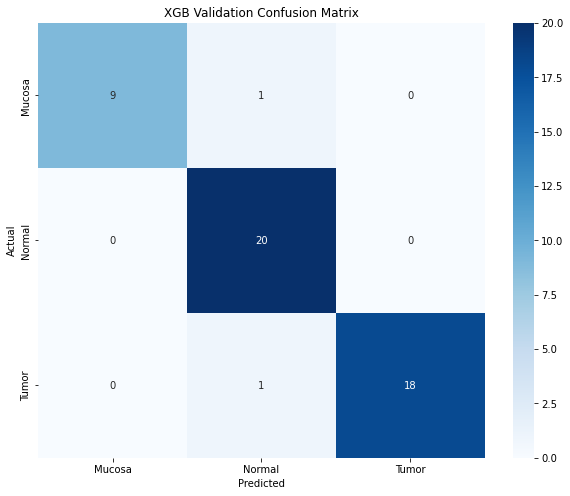

In [39]:
y_pred_val_xgb = xgb_clf.predict(X_val_selected)
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
balanced_accuracy_val_xgb = balanced_accuracy_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb, average='macro')
precision_val_xgb = precision_score(y_val, y_pred_val_xgb, average='macro')
recall_val_xgb = recall_score(y_val, y_pred_val_xgb, average='macro')
print("\nXGB Validation Metrics:")
print(f'Accuracy: {accuracy_val_xgb:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_xgb:.2f}')
print(f'F1-score: {f1_val_xgb:.2f}')
print(f'Precision: {precision_val_xgb:.2f}')
print(f'Recall: {recall_val_xgb:.2f}')
# Plot the confusion matrix for validation set
cm_val_xgb = confusion_matrix(y_val, y_pred_val_xgb)
cm_df_val_xgb = pd.DataFrame(cm_val_xgb, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('XGB Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Multi-Layer Perceptron (MLP)

In [40]:
from sklearn.neural_network import MLPClassifier

# Train MLP
mlp_clf = MLPClassifier(random_state=random_state)
cv_scores_mlp = cross_val_score(mlp_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("MLP Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_mlp)))
mlp_clf.fit(X_train_selected, y_train)

/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Mean cross-validation accuracy: 0.96


/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

Accuracy: 0.92
Balanced Accuracy: 0.92
F1-score: 0.91
Precision: 0.91
Recall: 0.92

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.82      0.90      0.86        10
      Normal       0.90      0.90      0.90        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.92        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.92      0.92      0.92        50



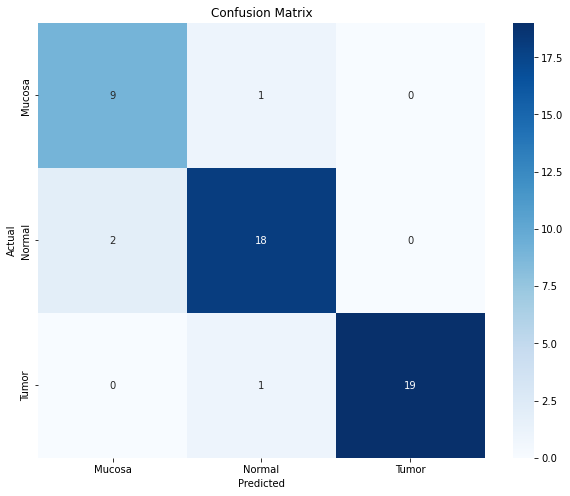

In [41]:
# Evaluate the model performance on the test set
y_pred_mlp = mlp_clf.predict(X_test_selected)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
balanced_accuracy_mlp = balanced_accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')
precision_mlp = precision_score(y_test, y_pred_mlp, average='macro')
recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')

print(f'Accuracy: {accuracy_mlp:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_mlp:.2f}')
print(f'F1-score: {f1_mlp:.2f}')
print(f'Precision: {precision_mlp:.2f}')
print(f'Recall: {recall_mlp:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_mlp, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


MLP Validation Metrics:
Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.96
Precision: 0.97
Recall: 0.95


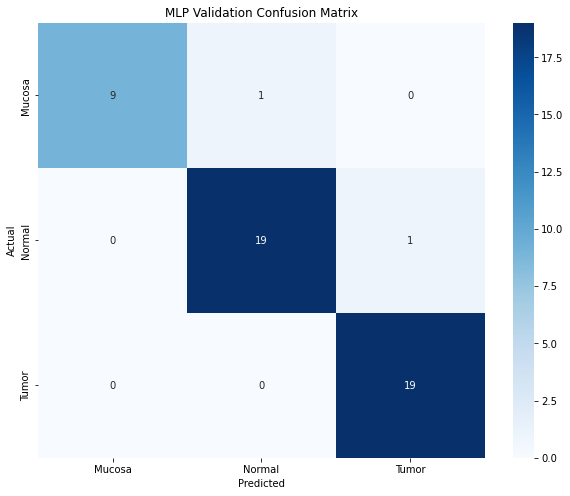

In [42]:
y_pred_val_mlp = mlp_clf.predict(X_val_selected)
accuracy_val_mlp = accuracy_score(y_val, y_pred_val_mlp)
balanced_accuracy_val_mlp = balanced_accuracy_score(y_val, y_pred_val_mlp)
f1_val_mlp = f1_score(y_val, y_pred_val_mlp, average='macro')
precision_val_mlp = precision_score(y_val, y_pred_val_mlp, average='macro')
recall_val_mlp = recall_score(y_val, y_pred_val_mlp, average='macro')
print("\nMLP Validation Metrics:")
print(f'Accuracy: {accuracy_val_mlp:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_mlp:.2f}')
print(f'F1-score: {f1_val_mlp:.2f}')
print(f'Precision: {precision_val_mlp:.2f}')
print(f'Recall: {recall_val_mlp:.2f}')
# Plot the confusion matrix for validation set
cm_val_mlp = confusion_matrix(y_val, y_pred_val_mlp)
cm_df_val_mlp = pd.DataFrame(cm_val_mlp, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_mlp, annot=True, cmap='Blues', fmt='g')
plt.title('MLP Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

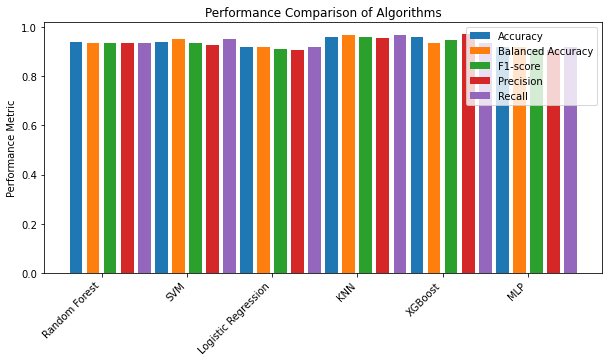

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding performance metrics
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP']
accuracy = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_xgb, accuracy_mlp]
balanced_accuracy = [balanced_accuracy_rf, balanced_accuracy_svm, balanced_accuracy_lr, balanced_accuracy_knn, balanced_accuracy_xgb, balanced_accuracy_mlp]
f1_score = [f1_rf, f1_svm, f1_lr, f1_knn, f1_xgb, f1_mlp]
precision = [precision_rf, precision_svm, precision_lr, precision_knn, precision_xgb, precision_mlp]
recall = [recall_rf, recall_svm, recall_lr, recall_knn, recall_xgb, recall_mlp]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis tick locations and labels
x = np.arange(len(models))
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Create a bar plot for each performance metric
bar_width = 0.15
bar1 = ax.bar(x - 0.3, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.1, balanced_accuracy, bar_width, label='Balanced Accuracy')
bar3 = ax.bar(x + 0.1, f1_score, bar_width, label='F1-score')
bar4 = ax.bar(x + 0.3, precision, bar_width, label='Precision')
bar5 = ax.bar(x + 0.5, recall, bar_width, label='Recall')

# Add labels and legend
ax.set_ylabel('Performance Metric')
ax.set_title('Performance Comparison of Algorithms')
ax.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.3)

# Display the plot
plt.show()

# PCA Plot of the Data

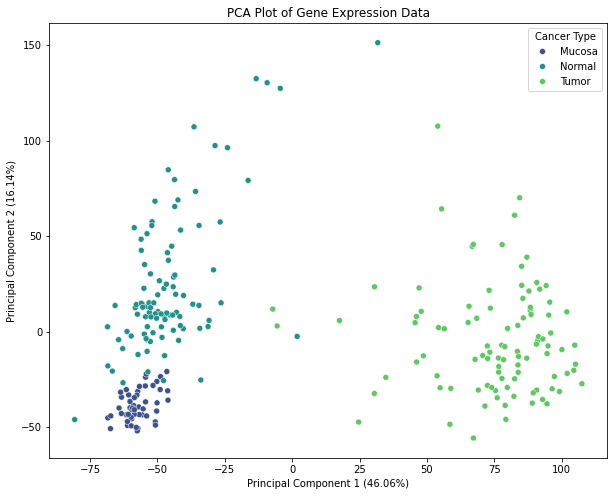

In [44]:
# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
pca_df['cancer_type'] = y

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cancer_type', data=pca_df, palette='viridis')
plt.title('PCA Plot of Gene Expression Data')
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.legend(title='Cancer Type')
plt.show()


# Cross validation

In [45]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf_scores = cross_val_score(rf_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Cross-Validation Score: {:.2f}".format(np.mean(rf_scores)))

# SVM 
svm_scores = cross_val_score(svm_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Cross-Validation Score: {:.2f}".format(np.mean(svm_scores)))

# Logistic Regression
lr_scores = cross_val_score(lr_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Logistic Regression Mean Cross-Validation Score: {:.2f}".format(np.mean(lr_scores)))

# KNN
knn_scores = cross_val_score(knn_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Mean Cross-Validation Score: {:.2f}".format(np.mean(knn_scores)))

# XGBoost
xgb_scores = cross_val_score(xgb_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Scores:", xgb_scores)
print("XGBoost Mean Cross-Validation Score: {:.2f}".format(np.mean(xgb_scores)))

# MLP
mlp_scores = cross_val_score(mlp_clf,X_train_selected, y_train, cv=5, scoring='accuracy')
print("MLP Cross-Validation Scores:", mlp_scores)
print("MLP Mean Cross-Validation Score: {:.2f}".format(np.mean(mlp_scores)))

Random Forest Cross-Validation Scores: [0.97222222 0.88888889 0.94285714 0.97142857 0.88571429]
Random Forest Mean Cross-Validation Score: 0.93
SVM Cross-Validation Scores: [0.88888889 0.91666667 1.         1.         0.82857143]
SVM Mean Cross-Validation Score: 0.93
Logistic Regression Cross-Validation Scores: [0.91666667 0.94444444 1.         1.         1.        ]
Logistic Regression Mean Cross-Validation Score: 0.97
KNN Cross-Validation Scores: [0.86111111 0.94444444 0.94285714 0.94285714 0.88571429]
KNN Mean Cross-Validation Score: 0.92
XGBoost Cross-Validation Scores: [0.86111111 0.83333333 0.97142857 0.94285714 0.94285714]
XGBoost Mean Cross-Validation Score: 0.91


/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Cross-Validation Scores: [0.91666667 0.94444444 1.         0.97142857 0.97142857]
MLP Mean Cross-Validation Score: 0.96


/home/pritam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


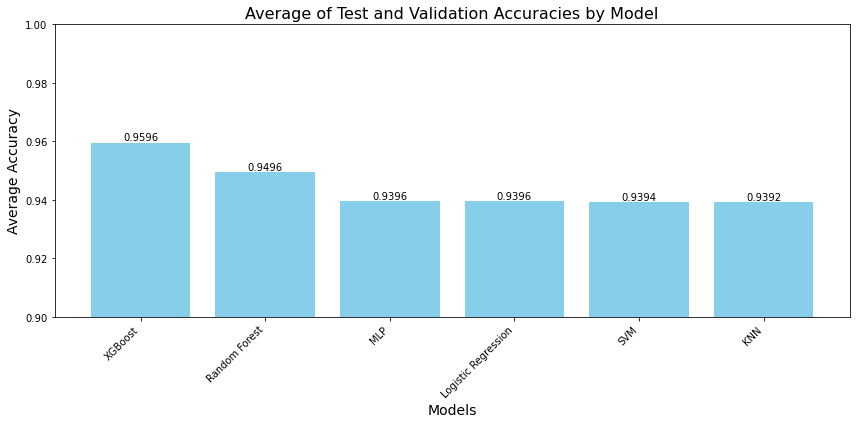

The best performing model is XGBoost with an average accuracy of 0.9596


In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average accuracies
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP']
test_accuracies = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_xgb, accuracy_mlp]
val_accuracies = [accuracy_val_rf, accuracy_val_svm, accuracy_val_lr, accuracy_val_knn, accuracy_val_xgb, accuracy_val_mlp]

avg_accuracies = [(test + val) / 2 for test, val in zip(test_accuracies, val_accuracies)]

# Sort models by average accuracy
sorted_indices = np.argsort(avg_accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_avg_accuracies = [avg_accuracies[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_models, sorted_avg_accuracies, color='skyblue')
plt.title('Average of Test and Validation Accuracies by Model', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Adjust this range if needed

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the best performing model
best_model = sorted_models[0]
best_accuracy = sorted_avg_accuracies[0]
print(f"The best performing model is {best_model} with an average accuracy of {best_accuracy:.4f}")

In [47]:
import pandas as pd

# Test Set Performance Table
test_data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_xgb, accuracy_mlp],
    'Balanced Accuracy': [balanced_accuracy_rf, balanced_accuracy_svm, balanced_accuracy_lr, balanced_accuracy_knn, balanced_accuracy_xgb, balanced_accuracy_mlp],
    'F1-score': [f1_rf, f1_svm, f1_lr, f1_knn, f1_xgb, f1_mlp],
    'Precision': [precision_rf, precision_svm, precision_lr, precision_knn, precision_xgb, precision_mlp],
    'Recall': [recall_rf, recall_svm, recall_lr, recall_knn, recall_xgb, recall_mlp]
}

test_df = pd.DataFrame(test_data)
test_df = test_df.set_index('Model')
test_df = test_df.round(8)  # Round to 4 decimal places for readability

print("Test Set Performance Metrics:")
print(test_df)
print("\n")

# Validation Set Performance Table
val_data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'XGBoost', 'MLP'],
    'Accuracy': [accuracy_val_rf, accuracy_val_svm, accuracy_val_lr, accuracy_val_knn, accuracy_val_xgb, accuracy_val_mlp],
    'Balanced Accuracy': [balanced_accuracy_val_rf, balanced_accuracy_val_svm, balanced_accuracy_val_lr, balanced_accuracy_val_knn, balanced_accuracy_val_xgb, balanced_accuracy_val_mlp],
    'F1-score': [f1_val_rf, f1_val_svm, f1_val_lr, f1_val_knn, f1_val_xgb, f1_val_mlp],
    'Precision': [precision_val_rf, precision_val_svm, precision_val_lr, precision_val_knn, precision_val_xgb, precision_val_mlp],
    'Recall': [recall_val_rf, recall_val_svm, recall_val_lr, recall_val_knn, recall_val_xgb, recall_val_mlp]
}

val_df = pd.DataFrame(val_data)
val_df = val_df.set_index('Model')
val_df = val_df.round(8)  # Round to 4 decimal places for readability

print("Validation Set Performance Metrics:")
print(val_df)

Test Set Performance Metrics:
                     Accuracy  Balanced Accuracy  F1-score  Precision  \
Model                                                                   
Random Forest            0.94           0.933333  0.933729   0.934921   
SVM                      0.94           0.950000  0.935509   0.926901   
Logistic Regression      0.92           0.916667  0.910501   0.906061   
KNN                      0.96           0.966667  0.958913   0.953030   
XGBoost                  0.96           0.933333  0.947090   0.969697   
MLP                      0.92           0.916667  0.910501   0.906061   

                       Recall  
Model                          
Random Forest        0.933333  
SVM                  0.950000  
Logistic Regression  0.916667  
KNN                  0.966667  
XGBoost              0.933333  
MLP                  0.916667  


Validation Set Performance Metrics:
                     Accuracy  Balanced Accuracy  F1-score  Precision  \
Model             